(rasch-model-notebook)=
# Modello di Rasch 

In [1]:
source("../_common.R")

suppressPackageStartupMessages({
    library("tidyverse")
    library("ltm")
    library("mirt")
    library("grid")
    library("TAM")
    # devtools::install_github("masurp/ggmirt")
    library("ggmirt")
    library("latex2exp")
    })

## Introduzione alla Teoria della Risposta all'Item

La psicometria, disciplina focalizzata sulla misurazione quantitativa delle abilità, atteggiamenti e tratti psicologici, ha subìto un'evoluzione significativa grazie all'emergere della Teoria della Risposta all'Item (IRT). Questo modello si distingue per la sua capacità di affrontare e conceptualizzare gli errori di misurazione in modo più efficace rispetto alla CTT. In questo capitolo, esploreremo le basi dell'IRT.

L'IRT rappresenta un cambiamento paradigmatico nella misurazione psicometrica. A differenza della CTT, che si concentra sul punteggio totale di un test, l'IRT si focalizza sulle risposte ai singoli item, permettendo un'analisi più dettagliata e accurata delle capacità di un individuo. L'essenza dell'IRT sta nella sua capacità di modellare la probabilità che un individuo risponda correttamente a un item specifico, basandosi sulle caratteristiche dell'item e sul livello di abilità dell'individuo.

Uno degli aspetti distintivi dell'IRT è la sua applicabilità alle risposte categoriali, comuni nei test psicometrici, dove gli individui selezionano risposte da un insieme di categorie predefinite.

L'IRT trova applicazione in una vasta gamma di contesti. È fondamentale nello sviluppo di test standardizzati, nella valutazione della qualità degli item di un test, e nella costruzione di punteggi compositi basati su risposte a più item. Inoltre, l'IRT è impiegata per sviluppare strumenti di valutazione più validi, offrendo una migliore comprensione delle abilità o tratti misurati.

L'aspetto unico dell'IRT è la sua capacità di analizzare l'interazione tra le caratteristiche degli item e le abilità degli individui. Questo permette una comprensione più approfondita di come diversi tipi di item influenzino le risposte degli individui, consentendo una misurazione più accurata e personalizzata.

Nonostante i suoi numerosi vantaggi, l'implementazione dell'IRT presenta alcune sfide, come la necessità di grandi campioni di dati e la complessità nella modellizzazione statistica. Nella seguente discussione dei modelli IRT seguiremo da vicino l'esposizione fornita da {cite:t}`debelak2022introduction` a cui si rimanda per ulteriori approfondimenti.

## La scala di Guttman

Prima di esplorare i modelli IRT, è importante comprendere lo scaling di Guttman. Lo scaling di Guttman serve a stabilire una relazione tra il livello di abilità di un individuo e le sue risposte ai vari item (domande o compiti) di un test. Nello scaling di Guttman si assume che vi sia una gerarchia definita nella difficoltà degli item di un test. Questa gerarchia è strettamente collegata alle abilità delle persone che svolgono il test. L'idea fondamentale è che una persona con un certo livello di abilità sia in grado di rispondere correttamente a tutti gli item che sono al suo livello di abilità o al di sotto, ma non a quelli che sono più difficili.

La Scala di Guttman viene rappresentata graficamente in un modo che mostra la relazione tra la probabilità di rispondere correttamente a un item e il livello di abilità del rispondente. Questa rappresentazione grafica è realizzata attraverso le cosiddette *curve caratteristiche degli item* (ICC). Le ICC illustrano la probabilità che un individuo risponda correttamente a un determinato item, in base al suo livello di abilità.

Nel grafico della Scala di Guttman:

- L'asse verticale rappresenta la probabilità di rispondere correttamente a un item. Secondo Guttman, questa probabilità è binaria: un individuo o risponde correttamente a un item (probabilità = 1.0) o non lo fa (probabilità = 0).
- L'asse orizzontale, invece, rappresenta il livello di abilità delle persone che affrontano il test.

Le cinque frecce nel grafico in basso indicano cinque persone con diversi livelli di abilità. Ogni freccia mostra il punto in cui l'abilità di una persona interseca le varie curve caratteristiche degli item. In un test ideale basato sulla Scala di Guttman, ogni persona dovrebbe essere in grado di rispondere correttamente a tutti gli item a sinistra della sua posizione sul grafico (ovvero, quelli meno difficili) e non riuscire a rispondere a quelli a destra (più difficili).

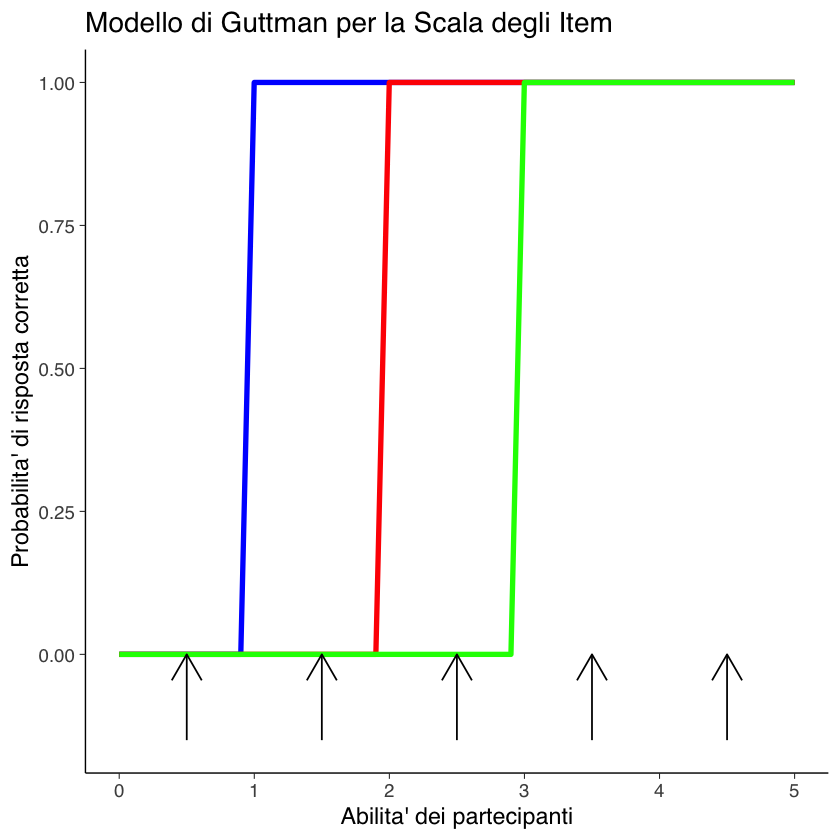

In [2]:
# Data creation
abilita <- seq(0, 5, by = 0.1)
difficolta_item_1 <- 1
difficolta_item_2 <- 2
difficolta_item_3 <- 3
probabilita_item_1 <- as.numeric(abilita >= difficolta_item_1)
probabilita_item_2 <- as.numeric(abilita >= difficolta_item_2)
probabilita_item_3 <- as.numeric(abilita >= difficolta_item_3)
data <- data.frame(abilita, probabilita_item_1, probabilita_item_2, probabilita_item_3)

# Plot creation
p <- ggplot(data, aes(x = abilita)) +
    geom_line(aes(y = probabilita_item_1), color = "blue", linewidth = 1.5) +
    geom_line(aes(y = probabilita_item_2), color = "red", linewidth = 1.5) +
    geom_line(aes(y = probabilita_item_3), color = "green", linewidth = 1.5) +
    labs(
        x = "Abilita' dei partecipanti", y = "Probabilita' di risposta corretta",
        title = "Modello di Guttman per la Scala degli Item"
    )

y_posizione_frecce <- -0.15

# Add arrows using annotate to avoid repetition warnings
p <- p + annotate("segment",
    x = 0.5, xend = 0.5, y = y_posizione_frecce, yend = 0,
    arrow = arrow(), color = "black"
) +
    annotate("segment",
        x = 1.5, xend = 1.5, y = y_posizione_frecce, yend = 0,
        arrow = arrow(), color = "black"
    ) +
    annotate("segment",
        x = 2.5, xend = 2.5, y = y_posizione_frecce, yend = 0,
        arrow = arrow(), color = "black"
    ) +
    annotate("segment",
        x = 3.5, xend = 3.5, y = y_posizione_frecce, yend = 0,
        arrow = arrow(), color = "black"
    ) +
    annotate("segment",
        x = 4.5, xend = 4.5, y = y_posizione_frecce, yend = 0,
        arrow = arrow(), color = "black"
    )

# Print the plot
print(p)

Il modello di Guttman si basa su un'ipotesi chiave riguardante la somma dei punteggi ottenuti dai partecipanti a un test. Secondo questo modello, se un individuo risponde correttamente a un item di difficile risoluzione, è logicamente presunto che abbia anche risposto correttamente a tutti gli item che sono considerati di difficoltà inferiore. Questo concetto implica che la capacità di rispondere a domande più difficili include implicitamente l'abilità di rispondere a quelle più semplici, rendendo il punteggio totale ottenuto in un test un indicatore affidabile dell'abilità complessiva della persona.

Tuttavia, il modello di Guttman non è esente da limitazioni. Una delle critiche principali è che raramente si osservano scale di Guttman pure nella pratica. In altre parole, non è sempre vero che i test seguano un andamento così rigido e prevedibile come quello proposto da Guttman. Nella realtà, la probabilità di rispondere correttamente a un item non sempre aumenta bruscamente da 0 a 1 al raggiungimento di una certa soglia di abilità. Piuttosto, questa probabilità può variare in modo più graduale, spesso descritta da una funzione sigmoidale.

Inoltre, è importante considerare che le curve caratteristiche degli item (ICC) possono variare nella loro ripidità per i diversi item di un test. Ciò significa che alcuni item potrebbero mostrare un cambiamento più marcato nella probabilità di risposta corretta al variare dell'abilità, mentre altri potrebbero mostrare un cambiamento più graduale. Questa variabilità delle ICC riflette la complessità e la diversità delle abilità umane e delle modalità con cui queste si manifestano in contesti dei test.

In sintesi, il modello di Guttman fornisce un quadro utile per comprendere la relazione tra abilità e performance in un test, ma è importante riconoscerne le limitazioni e comprendere che nella realtà psicometrica, le relazioni tra abilità, difficoltà dell'item e probabilità di risposta corretta possono essere più complesse e meno prevedibili di quanto il modello di Guttman suggerisca.

## Il Modello di Rasch

Il modello di Rasch può essere visto come un'evoluzione o un superamento dei limiti dello scaling di Guttman. Consideriamo, ad esempio, la competenza matematica. Possiamo considerare la competenza matematica come una variabile latente, cioè un tratto non direttamente osservabile che può essere dedotto tramite comportamenti misurabili. Supponiamo di utilizzare un test di matematica con cinque domande per valutare la competenza matematica degli individui; le risposte a queste domande sono le nostre osservazioni misurabili.

Secondo il modello di Rasch, sia la difficoltà delle domande del test che le abilità dei partecipanti sono rappresentate su un unico continuum. Le competenze più elevate si trovano verso l'estremità superiore di questo continuum, mentre le inferiori si collocano verso l'estremità opposta. Le domande del test sono disposte lungo questo continuum in base alla loro difficoltà. Ad esempio, i valori come -2, -1 ecc. indicano la difficoltà specifica di ciascuna domanda, dove $\beta_i$ rappresenta la posizione della i-esima domanda.

Analogamente, la competenza matematica di un individuo è indicata da $\theta$, che rappresenta la sua posizione sul continuum. Questo permette di effettuare comparazioni dirette tra come un individuo potrebbe rispondere a una determinata domanda. Un individuo collocato al valore 0 del continuum ha una probabilità maggiore di rispondere correttamente a domande meno difficili (ad esempio, una con $\beta = -2$), mentre la sua probabilità di rispondere correttamente diminuisce per domande poste vicino al suo valore di $\theta$.

Quando si somministra una domanda più difficile (come una con $\beta = 1$) a una persona con $\theta = 0$, è probabile che la risposta sia errata, ma esiste comunque una possibilità che risponda correttamente a causa della vicinanza tra la competenza richiesta dalla domanda e quella posseduta dall'individuo. La distanza tra le posizioni di una persona e di una domanda sul continuum influisce sulla certezza della risposta prevista: maggiore è la distanza, più certa è la risposta attesa. Quando questa distanza si riduce, la probabilità di una risposta corretta o errata diventa quasi equiprobabile, trasformando le previsioni sulle risposte in stime probabilistiche e offrendo una visione più matizzata delle competenze dell'individuo.

Per analizzare il modello di Rasch, consideriamo i dati reali da un test di matematica per esaminare come i punteggi totali dei partecipanti (un indicatore delle loro abilità latenti) influenzino la probabilità di rispondere correttamente a domande di varia difficoltà. L'analisi di questi dati ci aiuta a verificare in pratica la teoria alla base del modello di Rasch, permettendo di osservare che gli individui con punteggi più alti tendono a rispondere correttamente a domande più difficili, mentre quelli con punteggi più bassi mostrano una maggiore probabilità di successo con domande più facili.

In [3]:
math_dat <- rio::import("../data/deAyala/Math.txt")
head(math_dat)

,V1,V2,V3,V4,V5
,<int>,<int>,<int>,<int>,<int>
1,1,1,0,0,0
2,1,1,1,0,0
3,1,0,0,0,0
4,1,1,1,0,0
5,1,0,1,1,0
6,1,1,1,0,0


Calcoliamo la media delle risposte corrette per ciascun item:

In [4]:
colMeans(math_dat)

V1        V2        V3        V4        V5 
0.8874547 0.6440488 0.5659915 0.4269680 0.3873272

Gli item del test sono ordinati per difficoltà crescente: V1 è il più facile, seguito da V2, V3, V4 e V5, che sono progressivamente più difficili.

Ora calcoliamo la proporzione di risposte corrette per ciascun item, tenendo conto del livello di abilità dei partecipanti, che deduciamo dal loro punteggio complessivo nel test.

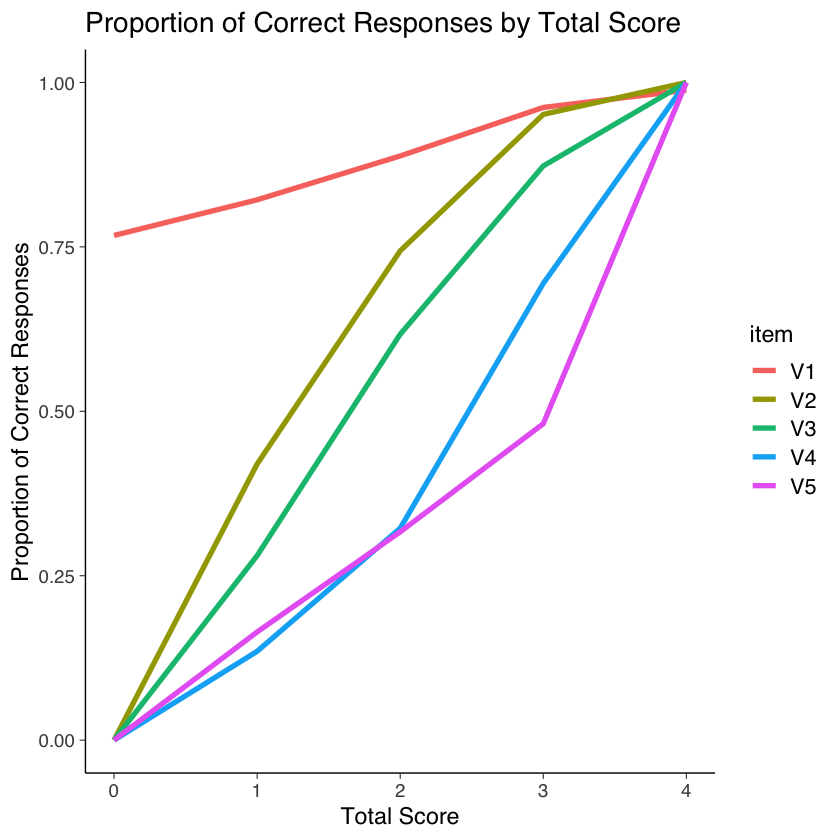

In [5]:
# Calculate the total score for each subject
math_dat2 <- math_dat
math_dat2$total_score <- rowSums(math_dat2[, -1])

# Prepare data for plotting
plot_data <- lapply(names(math_dat2)[1:5], function(item) {
    math_dat2 %>%
        group_by(total_score) %>%
        summarise(
            proportion = mean(get(item) == 1)
        ) %>%
        mutate(item = item)
})

plot_data <- do.call(rbind, plot_data)

# Plotting
ggplot(plot_data, aes(x = total_score, y = proportion, group = item, color = item)) +
    geom_line(linewidth = 1.5) +
    labs(
        x = "Total Score", 
        y = "Proportion of Correct Responses",
        title = "Proportion of Correct Responses by Total Score"
    ) 

Si nota che la probabilità di rispondere correttamente a un item aumenta con il crescere della competenza matematica generale, rappresentata dal punteggio totale. Inoltre, gli item più facili tendono ad avere una probabilità più alta di risposta corretta rispetto agli item più difficili. Questo pattern conferma che quanto maggiore è l'abilità generale di un individuo, tanto maggiore è la sua capacità di rispondere correttamente agli item del test.

## Curva Caratteristica dell'Item

Dopo aver analizzato le tendenze nelle risposte ai vari item del test, ci possiamo porre il problema di sviluppare un modello matematico che descriva come la posizione di un individuo su un continuum latente influisce sulle sue risposte. La non linearità osservata nelle curve caratteristiche degli item (ICC) empiriche della figura precedente suggerisce che un modello di regressione lineare non sarebbe appropriato in questo contesto. Infatti, l'andamento curvilineo e ogivale delle curve, simile alle distribuzioni cumulative logistiche o normali, indica la necessità di utilizzare una funzione logistica per la nostra analisi, scelta per la sua capacità di modellare variazioni graduali e continuative.

La curva caratteristica dell'item, definita dalla funzione logistica, rappresenta un'evoluzione del modello di Guttman. A differenza di quest'ultimo, che suggerisce un cambiamento netto e improvviso nella probabilità di risposta corretta, il modello rappresentato dall'ICC descrive un cambiamento graduale, delineato da una curva sigmoidale. Questo rende la rappresentazione più fedele alla realtà del comportamento di risposta.

La teoria della risposta agli item (IRT) si distacca dallo scaling di Guttman fornendo un modello statistico per descrivere le ICC. In questo contesto, il modello di Rasch si distingue per la sua elegante semplicità, postulando che le curve caratteristiche di tutti gli item siano parallele e abbiano la stessa pendenza. Secondo il modello di Rasch, quindi, la difficoltà di un item è l'unico fattore che modifica la forma della curva caratteristica, illustrando chiaramente come la probabilità di risposta corretta varia in funzione dell'abilità latente del rispondente, $\theta$.

Nella figura seguente, vediamo le ICC rappresentate con delle funzioni matematiche per i cinque item analizzati secondo il modello di Rasch. L'asse orizzontale mostra l'abilità latente dei rispondenti, mentre l'asse verticale rappresenta la probabilità di una risposta corretta. Ogni curva sigmoidale, distinta per colore, corrisponde a uno degli item del test. La parallelità di queste curve conferma che la probabilità di rispondere correttamente varia esclusivamente in base all'abilità dei rispondenti, senza influenze esterne sulla forma della curva.

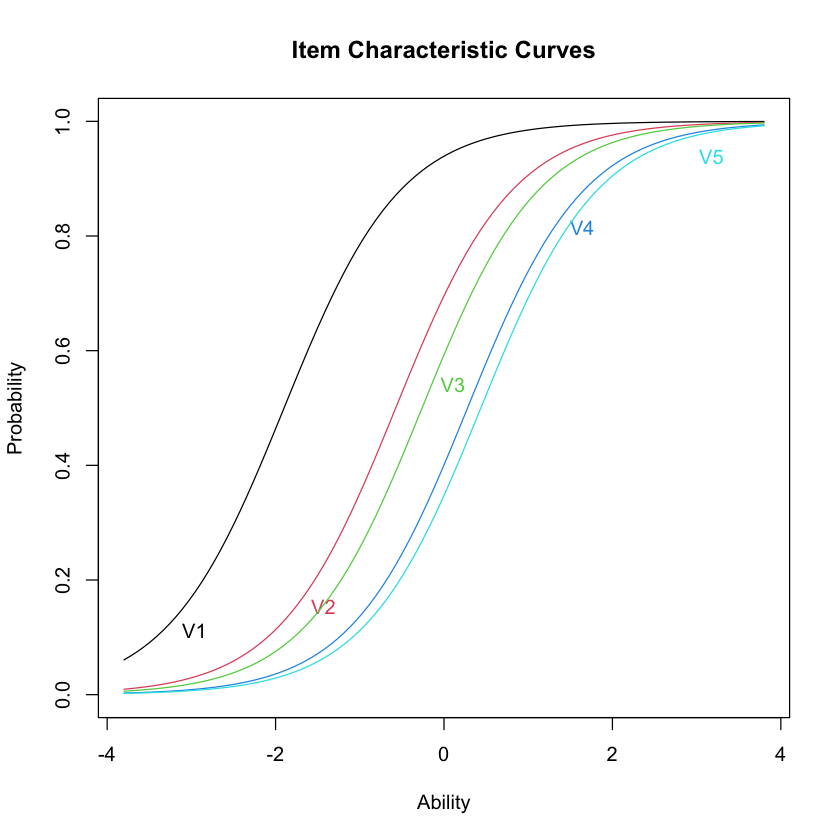

In [6]:
# Adatta il modello di Rasch
rasch_model <- rasch(math_dat)

# Crea le curve caratteristiche degli item
plot(rasch_model, type = "ICC")

## Il Modello di Rasch per Risposte Binarie

Dopo aver introdotto il modello di Rasch in termini intuitivi, esploriamo in modo più formale il legame tra l'abilità latente di un individuo, indicata con $\theta$, e le risposte osservate. Il modello di Rasch postula che un incremento nell'abilità latente $\theta_p$ di una persona $p$ elevi la probabilità di rispondere correttamente all'item $i$. Questo rapporto è descritto attraverso la funzione logistica, impiegata anche nella regressione logistica:

$$ 
\text{Pr}(U_{i} = 1 \mid \theta) = \frac{e^z}{1 + e^z},
$$

dove $\text{Pr}(U_{i} = 1 \mid \theta)$ denota la probabilità che la risposta all'item $i$ sia corretta, data l'abilità latente $\theta$. La variabile $z$ in questa equazione è definita come:

$$z = \theta_p - \beta_i$$

Questo valore rappresenta la distanza tra la posizione latente della persona $p$, espressa come $\theta_p$, e quella dell'item $i$, $\beta_i$. La definizione di $z$ in questi termini permette al modello di Rasch di calcolare la probabilità di una risposta corretta all'item $i$ basandosi sulla posizione relativa sul continuum di abilità tra la persona $p$ e l'item $i$.

Inserendo $\theta_p - \beta_i$ al posto di $z$ nella funzione logistica, otteniamo l'espressione seguente:

$$ 
\text{Pr}(U_{pi} = 1 \mid \theta_p, \beta_i) = \frac{\exp(\theta_p - \beta_i)}{1 + \exp(\theta_p - \beta_i)} = \frac{1}{1 + \exp(-(\theta_p - \beta_i))}. 
$$ (eq-rasch-model)

Questa formula mostra come la probabilità che una persona con un certo livello di abilità $\theta_p$ risponda correttamente all'item $i$ sia influenzata dalla differenza tra l'abilità del rispondente $\theta_p$ e la difficoltà dell'item $\beta_i$. Maggiore è questa differenza a favore dell'abilità, più alta sarà la probabilità di successo. In termini semplici, l'equazione afferma che la probabilità di una risposta corretta è funzione della distanza tra la posizione dell'individuo $p$ ($\theta_p$) e quella dell'item $i$ ($\beta_i$). L'equazione trasforma questa distanza, che potrebbe teoricamente variare da $-\infty$ a $+\infty$, in una probabilità confinata nell'intervallo [0, 1].

È importante sottolineare che, sebbene teoricamente le posizioni degli item ($\beta_i$) e delle persone ($\theta_p$) possano estendersi da $-\infty$ a $+\infty$, nella pratica esse si collocano generalmente tra -3 e +3. Nel contesto di test di competenza, queste posizioni rappresentano i vari livelli di difficoltà: item con valori inferiori a 0.0 sono considerati "facili" (ad esempio, -2.0), mentre quelli con valori superiori a 0.0 sono "difficili" (esempio, +2.0). Gli item intorno allo 0.0 sono di difficoltà intermedia e, mentre gli item "facili" sono spesso risolti correttamente anche da persone meno abili, quelli "difficili" tendono a essere superati solo da individui più competenti.

## Rappresentazione Alternativa della Funzione Logistica

La funzione logistica utilizzata nel modello di Rasch può essere scritta in due modi: con la funzione esponenziale sia al numeratore sia al denominatore (a sinistra), oppure equivalentemente con la funzione esponenziale solo al denominatore, seguita dal suo argomento negativo (a destra):

$$ 
\frac{\exp(\theta_p - \beta_i)}{1 + \exp(\theta_p - \beta_i)} = \frac{1}{1 + \exp(-(\theta_p - \beta_i))} 
$$

Per dimostrare l'equivalenza delle due espressioni della funzione logistica nel modello di Rasch, seguiamo i seguenti  passaggi algebrici. Per semplificare il lato destro, utilizziamo la proprietà dell'esponenziale che afferma $ e^{-x} = \frac{1}{e^x} $. Quindi, riscriviamo $ \exp(-(\theta_p - \beta_i)) $ come $ \frac{1}{\exp(\theta_p - \beta_i)} $:

   $$ \frac{1}{1 + \frac{1}{\exp(\theta_p - \beta_i)}} $$

Il denominatore del lato destro diventa $ 1 + \frac{1}{\exp(\theta_p - \beta_i)} $. Per combinare i termini nel denominatore, otteniamo un denominatore comune:

   $$ \frac{1}{\frac{\exp(\theta_p - \beta_i) + 1}{\exp(\theta_p - \beta_i)}} $$

Simplificando ulteriormente, il denominatore diventa $ \exp(\theta_p - \beta_i) + 1 $, quindi l'intera espressione diventa:

   $$ \frac{1}{\exp(\theta_p - \beta_i) + 1} $$

Possiamo ora invertire la frazione per ottenere il lato sinistro dell'equazione originale:

   $$ \frac{\exp(\theta_p - \beta_i)}{\exp(\theta_p - \beta_i) + 1} $$

Quindi, abbiamo dimostrato che il lato sinistro e il lato destro dell'equazione originale sono effettivamente equivalenti.

### Esempio Computazionale

Per illustrare come il modello di Rasch venga utilizzato per calcolare i punti su una curva caratteristica dell'item, consideriamo il seguente problema esemplificativo. I valori dei parametri dell'item sono:

- a = 1 è il parametro di discriminazione dell'item,
- b = -0.5 è il parametro di difficoltà dell'item.

Troviamo la probabilità di rispondere correttamente a questo item al livello di abilità theta = 1.5. 

In [7]:
icc <- function(a, b, theta) {
    1 / (1 + exp(-a * (theta - b)))
}

a = 1
b = -0.5
theta = 1.5
icc(a, b, theta)

[1] 0.8807971

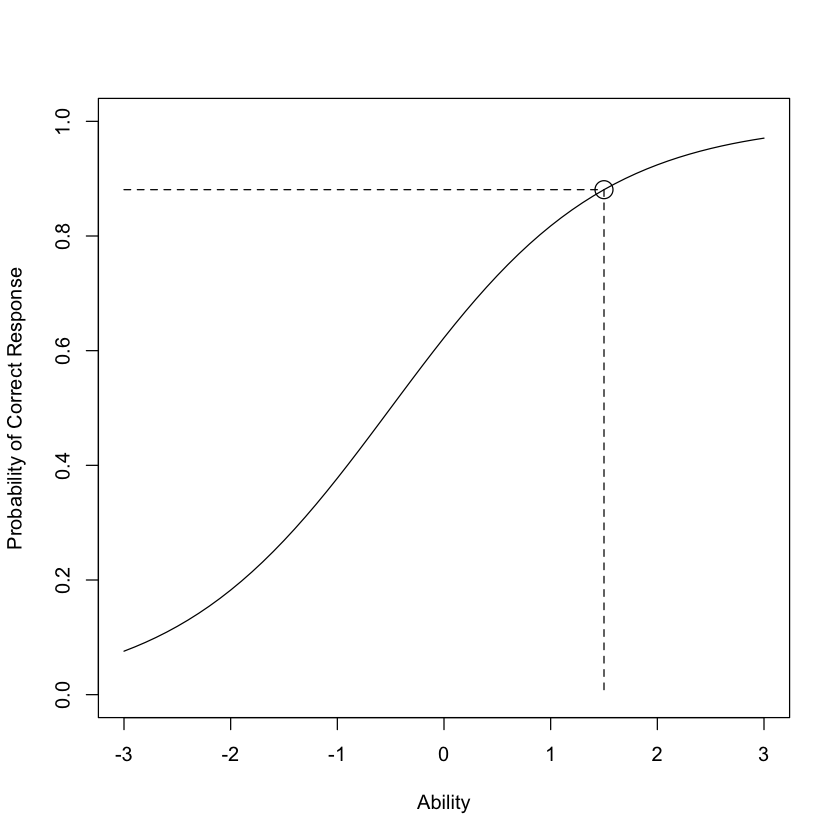

In [8]:
theta_range <- seq(-3, 3, .1)
plot(theta_range, icc(a, b, theta_range),
    type = "l", xlim = c(-3, 3), ylim = c(0, 1),
    xlab = "Ability", ylab = "Probability of Correct Response"
)
points(theta, icc(a, b, theta), cex=2)
segments(-3, icc(a, b, theta), theta, icc(a, b, theta), lty = "dashed")
segments(theta, icc(a, b, theta), theta, 0, lty = "dashed")

## La Funzione Logistica e la Proprietà di Oggettività Specifica nel Modello di Rasch

Una delle caratteristiche fondamentali del modello di Rasch è la proprietà di oggettività specifica, che afferma che la differenza tra il logit della probabilità di rispondere correttamente a due diversi item, $i$ e $j$, è costante per ogni livello di abilità $\theta$. Questo implica che, indipendentemente dall'abilità di un rispondente, il confronto tra due item rimane stabile, riflettendo un principio fondamentale di misurazione oggettiva nel modello di Rasch. 

### La Funzione Logistica nel Modello di Rasch

Nel modello di Rasch, la funzione logistica trasforma i logit — i logaritmi delle quote di probabilità di una risposta corretta rispetto a una errata — in probabilità effettive. I logit sono definiti come $\theta_p - \beta_i$, dove $\theta_p$ rappresenta il livello di abilità di una persona e $\beta_i$ la difficoltà dell'item. Questa trasformazione è cruciale per interpretare i dati raccolti nei test.

Matematicamente, il logit della probabilità di una risposta corretta a un item è espresso dalla seguente formula:

$$ 
\log \left( \frac{\text{Pr}(U_{pi} = 1 | \theta_p, \beta_i)}{\text{Pr}(U_{pi} = 0 | \theta_p, \beta_i)} \right) = \theta_p - \beta_i. 
$$

La probabilità $\pi$ di risposta corretta è calcolata così:

$$ 
\pi = \frac{\exp(\theta_p - \beta_i)}{1 + \exp(\theta_p - \beta_i)},
$$

e il suo complemento, $1 - \pi$, è dato da:

$$ 
1 - \pi = \frac{1}{1 + \exp(\theta_p - \beta_i)}. 
$$

Definendo le quote $O$ come $\exp(\theta_p - \beta_i)$, otteniamo una forma semplice per il logaritmo delle quote:

$$ 
\log(O) = \theta_p - \beta_i. 
$$

Questa formula dimostra che i logit sono direttamente proporzionali alla differenza tra l'abilità del rispondente e la difficoltà dell'item. Un incremento in questa differenza aumenta la probabilità di una risposta corretta, riflettendo che valori più alti sui logit indicano un vantaggio dell'abilità rispetto alla difficoltà dell'item.

### Implicazioni della Proprietà di Oggettività Specifica

L'oggettività specifica nel modello di Rasch significa che il confronto tra due item è indipendente dall'abilità dei rispondenti. Nella pratica, ciò si traduce nel fatto che le curve caratteristiche degli item (ICC) per diversi item sono parallele lungo la scala dei logit, poiché la differenza $\theta_p - \beta_i$ è costante tra gli item. Le curve per item con diverse difficoltà si intersecano a livelli diversi sull'asse verticale ma mantengono una pendenza costante, illustrando che ogni differenza nelle probabilità di risposta tra due item è esclusivamente attribuibile alle loro difficoltà intrinseche e non varia con il cambiamento dell'abilità dei partecipanti.

In sintesi, la rappresentazione logit fornisce non solo un modo per calcolare la probabilità di una risposta corretta, ma anche un metodo robusto per mantenere la comparabilità e la coerenza delle misure tra diversi item, garantendo così una valutazione equa e precisa delle abilità del rispondente.

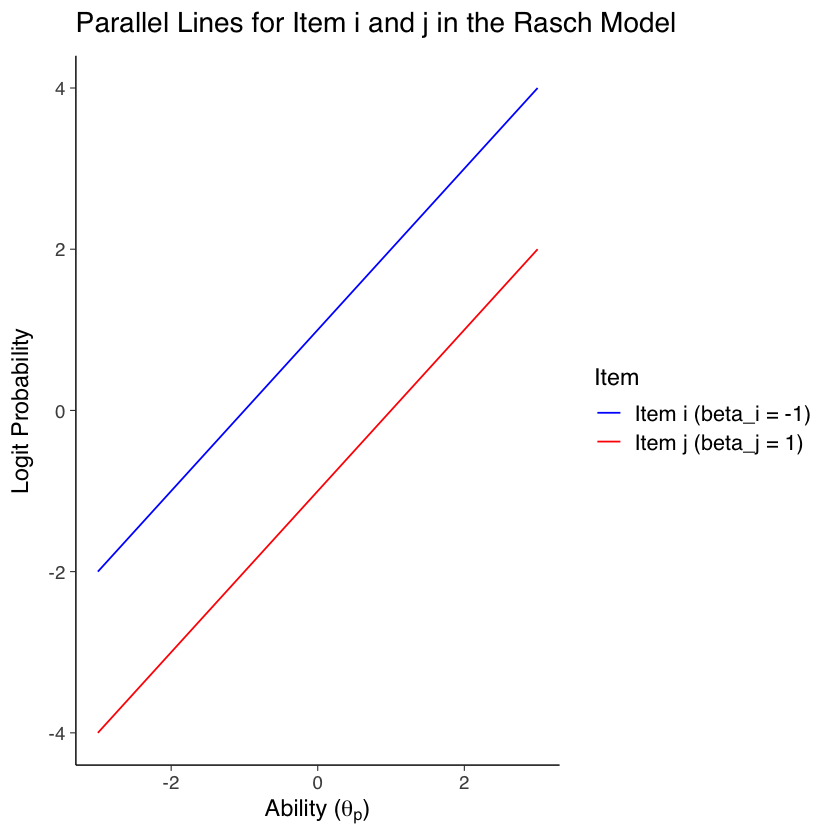

In [9]:
# Creazione di un dataframe con i valori di abilità (theta_p) e le difficoltà degli item (beta)
theta_p <- seq(-3, 3, length.out = 100)
beta_i <- -1
beta_j <- 1

# Calcolo dei logit per gli item i e j
logit_i <- theta_p - beta_i
logit_j <- theta_p - beta_j

data <- data.frame(
    Ability = c(theta_p, theta_p),
    Logit = c(logit_i, logit_j),
    Item = factor(c(rep("Item i (beta_i = -1)", length(theta_p)), rep("Item j (beta_j = 1)", length(theta_p))))
)

ggplot(data, aes(x = Ability, y = Logit, color = Item)) +
    geom_line() +
    scale_color_manual(values = c("blue", "red")) +
    ggtitle(TeX("Parallel Lines for Item i and j in the Rasch Model")) +
    xlab(TeX("Ability ($\\theta_p$)")) +
    ylab(TeX("Logit Probability"))

(sec-rasch-prob-risp-errata)=
## Probabilità di una Risposta Errata

Il modello di Rasch non ammette il credito parziale. Pertanto, $ U_{pi} $ è o zero o uno per ogni persona e item del test, e le probabilità di questi due possibili esiti devono sommarsi a uno, il che significa 

$$ \text{Pr}(U_{pi} = 1 | \theta_p, \beta_i) + \text{Pr}(U_{pi} = 0 | \theta_p, \beta_i) = 1. $$

Risolvendo per $ \text{Pr}(U_{pi} = 0 | \theta_p, \beta_i) $, otteniamo

$$ \text{Pr}(U_{pi} = 0 | \theta_p, \beta_i) = 1 - \text{Pr}(U_{pi} = 1 | \theta_p, \beta_i) = 1 - \frac{\exp(\theta_p - \beta_i)}{1 + \exp(\theta_p - \beta_i)} $$

dopo aver sostituito l'eq. {eq}`eq-rasch-logit` per $ \text{Pr}(U_{pi} = 1 | \theta_p, \beta_i) $. Possiamo semplificare l'ultima espressione espandendo il 1 per ottenere

$$ \text{Pr}(U_{pi} = 0 | \theta_p, \beta_i) = \frac{1 + \exp(\theta_p - \beta_i) - \exp(\theta_p - \beta_i)}{1 + \exp(\theta_p - \beta_i)} = \frac{1}{1 + \exp(\theta_p - \beta_i)}. $$

## Il Modello di Rasch e l'Analisi Fattoriale

Per una migliore comprensione del Modello di Rasch, è utile confrontarlo con l'Analisi Fattoriale. Nonostante le loro differenze come metodologie statistiche, entrambi cercano un obiettivo comune: comprendere le dimensioni latenti sottostanti alle risposte osservate nei dati. Questo parallelo aiuta a mettere in luce le somiglianze e le differenze tra i due approcci.

Nell'Analisi Fattoriale, il modello tipico è espresso come $Y_i = \lambda_i \xi + \delta_i$, dove $Y_i$ è il punteggio osservato per l'item i-esimo, $\lambda_i$ rappresenta la saturazione fattoriale che indica quanto l'item è influenzato dal fattore latente $\xi$, e $\delta_i$ è il termine di errore specifico per quell'item. L'idea centrale è che, controllando per $\xi$, le correlazioni tra gli item $Y_i$ diventano nulle, poiché qualsiasi associazione comune è spiegata dal fattore latente.

D'altra parte, il Modello di Rasch adotta un approccio leggermente diverso, ma con lo stesso obiettivo fondamentale: identificare e gestire l'influenza di una dimensione latente (spesso chiamata abilità) sulle risposte agli item. In questo contesto, si considerano risposte dicotomiche (0 o 1), e si presume che la probabilità di una risposta corretta a un item sia una funzione logistica dell'abilità del rispondente $\theta$ e della difficoltà dell'item $\delta_i$.

La principale differenza tra il Modello di Rasch e l'Analisi Fattoriale risiede nella formulazione dei parametri. Mentre l'Analisi Fattoriale stima le saturazioni fattoriali per ciascun item, il Modello di Rasch assume che tutti gli item abbiano lo stesso potere discriminante, cioè sono ugualmente efficaci nel distinguere tra rispondenti con diversi livelli di abilità. Invece di concentrarsi sulle saturazioni fattoriali, il Modello di Rasch si concentra sulla stima dell'abilità dei rispondenti $\theta$ e sulla difficoltà degli item $\delta_i$, presupponendo che gli item siano equivalenti in termini di discriminazione.

In conclusione, sia il Modello di Rasch che l'Analisi Fattoriale mirano a isolare e controllare l'effetto di una dimensione latente sull'associazione tra gli item, cercando di spiegare le risposte osservate attraverso questa dimensione. Mentre l'Analisi Fattoriale si concentra sulla stima delle saturazioni fattoriali e sull'identificazione di fattori latenti comuni tra gli item, il Modello di Rasch si focalizza sulla stima dell'abilità dei rispondenti e sulla difficoltà degli item, fornendo un quadro dettagliato delle dinamiche che influenzano le risposte agli item.

## Considerazioni Conclusive

Il modello di Rasch si distingue notevolmente dalla Teoria Classica dei Test (CTT) per diversi aspetti fondamentali. In primo luogo, il modello di Rasch consente un'analisi dettagliata sia a livello di singolo item sia per l'intero strumento di misurazione. Questo contrasta con la CTT, che si concentra principalmente sull'analisi aggregata dell'intero test, esprimendo il punteggio totale con la formula $X = T + E$, dove $T$ indica l'abilità vera e $E$ l'errore. Il modello di Rasch, invece, modella la probabilità di una risposta corretta per ogni item specifico, seguendo l'approccio focalizzato sugli item proposto da Guttman.

L'approccio del modello di Rasch rappresenta una deviazione significativa dalla CTT poiché analizza le risposte osservate piuttosto che semplicemente sommarle. Questo cambio di paradigma offre numerosi vantaggi rispetto alla CTT:

**Precisione e Dettaglio**: L'analisi item per item nel modello di Rasch fornisce una comprensione molto più fine di come ciascun item funziona individualmente, permettendo di identificare specifiche aree di forza o debolezza sia nei test che nei rispondenti. Questo livello di dettaglio contribuisce a una misurazione più accurata e a una riduzione degli errori di misurazione.

**Separazione tra Attributi della Persona e Caratteristiche dell'Item**: Un vantaggio chiave del modello di Rasch rispetto alla CTT è la netta distinzione tra l'abilità della persona ($\theta_p$) e la difficoltà dell'item ($b_i$). Nel modello di Rasch, la difficoltà degli item è considerata una proprietà costante, indipendente dal gruppo di rispondenti, il che aumenta notevolmente la precisione e la flessibilità nella misurazione.

**Flessibilità nei Modelli di Risposta**: Il modello di Rasch può adattarsi a diversi tipi di formati di domanda, inclusi quelli a scelta multipla, le scale Likert, e le domande aperte, permettendo un'analisi complessiva che cattura meglio la cognizione e il comportamento umano.

**Valutazione Adattiva**: L'IRT, e in particolare il modello di Rasch, permette valutazioni personalizzate basate sul livello di abilità dei rispondenti. Questo approccio riduce gli errori di misurazione, fornendo informazioni più precise e utili.

**Analisi Approfondita degli Item**: Il modello di Rasch consente un'analisi dettagliata degli item, valutando aspetti come la discriminazione, la difficoltà e i parametri di indovinamento. Queste informazioni sono essenziali per il miglioramento continuo degli item e dei test.

Sebbene il modello di Rasch sia ampiamente apprezzato per la sua eleganza matematica e la sua applicazione pratica, è anche oggetto di critiche per le sue assunzioni relativamente restrittive, che alcuni studiosi ritengono limitino la sua capacità di catturare la complessità delle risposte agli item in scenari reali. Tuttavia, le sue assunzioni di base fornicono un quadro robusto per l'analisi dei dati, sostenendo l'invarianza delle proprietà degli item e delle abilità delle persone attraverso diversi contesti e gruppi di rispondenti.

## Session Info

In [10]:
sessionInfo()

R version 4.3.3 (2024-02-29)
Platform: aarch64-apple-darwin20 (64-bit)
Running under: macOS Sonoma 14.4.1

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.3-arm64/Resources/lib/libRblas.0.dylib 
LAPACK: /Library/Frameworks/R.framework/Versions/4.3-arm64/Resources/lib/libRlapack.dylib;  LAPACK version 3.11.0

locale:
[1] C/UTF-8/C/C/C/C

time zone: Europe/Rome
tzcode source: internal

attached base packages:
[1] grid      stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] latex2exp_0.9.6   ggmirt_0.1.0      TAM_4.2-21        CDM_8.2-6        
 [5] mvtnorm_1.2-4     mirt_1.41         lattice_0.22-5    ltm_1.2-0        
 [9] polycor_0.8-1     msm_1.7.1         MASS_7.3-60.0.1   ggokabeito_0.1.0 
[13] viridis_0.6.5     viridisLite_0.4.2 ggpubr_0.6.0      ggExtra_0.10.1   
[17] bayesplot_1.11.1  gridExtra_2.3     patchwork_1.2.0   semTools_0.5-6   
[21] semPlot_1.1.6     lavaan_0.6-17     psych_2.4.3